In [ ]:
### FUNCIONES y CÓDIGO REMOVIDO DEL PROYECTO ###

# El código en EntradaVariable.py pretendia graficar la corriente eficaz
# en el inductor y primario de transformador (son iguales) para 
# valores de tensión de entrada y salida, diferentes respectivamente.
# Es una función que utilizaba una versión anterior de la funcion CalcularCtes.py
# 
# El codigo en CorrienteMaxInductor.py permite calcular esa corriente,
# tambien haciendo uso de CalcularCtes.py pero esta vez variando la
# frecuencia, entre 10kHz y 50kHz, y en la condición de máxima potencia
# de funcionamiento, que en este caso es cuando Vi=Vi_max=375V
# 
# El codigo en InduccionNucleos.py ejecuta el codigo de CorrienteMaxInductor.py
# múltiples veces, permitiendo graficar la inducción magnética presente
# en el núcleo del transformador con la variación de frecuencia, con el
# fin de seleccionar un núcleo con características de inducción de 
# saturación superiores, asistiendo el diseño del convertidor DAB.

# Funciones programadas no utilizadas en el diseño.
import EntradaVariable #(Utilizaba versión anterior de CalcularCtes.py)
import CorrienteMaxInductor
import InduccionNucleos
# Funcion auxiliar de python requerida en este documento de Jupyter Notebook.
import numpy as np

In [ ]:
Vi_min=19       
Vi_max=33
Vo_n=24
n=1             #Relación de transformador de alta frecuencia HFT.
D=0.4
L=100e-6        #Inductancia equivalente total de perdidas (Lcomp+Lper del HFT).
fs=33.25e3      #Frecuencia de conmutacion de llaves electronicas MOSFET.

pts=int(round(((Vi_max-Vi_min)),0)+1)        #Número de puntos a graficar
EntradaVariable.graficarCorriente(Vo_n,Vi_min,Vi_max,n,L,fs,pts)

In [ ]:
## Calculador automatico de tiempo muerto.
## Esta funcion grafica el tiempo de espera entre el apagado de una llave y el encendido 

# Mosfet 2SK1544
Coss_10V = 920e-12  # 920pF
Coss_100V = 270e-12 # 270pF
# IGBT GT25Q101
# Coss_10V =  300e-12 # 300pF
# Coss_100V = 95e-12  # 95pF
# Coss_300V = 60e-12  # 60pF
#  
Coss=Coss_100V
Ceq=2*Coss*9

# Caso Vi=Vi_max Vo=Vo_n   =>  I2=35A
td_min=Vi_max*Ceq/35
print("Considerando que se multiplica por 9 la capacidad equivalente,\n agregando capacitores en paralelo con las llaves: \n")

print("\nDispositivo MOSFET 2SK1544: 500V / 25A \n")
print("Caso Vi=Vi_max Vo=Vo_n   =>  I2=35A      =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")
# Caso Vi=Vi_min Vo=Vo_n   =>  I2=21.1A
td_min=Vi_min*Ceq/21.1
print("Caso Vi=Vi_min Vo=Vo_n   =>  I2=21.1A    =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")
# Caso Vi=100V Vo=160V   =>  I2=21.1A    (Unico caso para Coss adquirible de la hoja de datos)
td_min=80*Ceq/8.4
print("Caso Vi=100V   Vo=160V   =>  I2=8.4A    =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")

# IGBT GT25Q101
Coss_10V =  300e-12 # 300pF
Coss_100V = 95e-12  # 95pF
Coss_300V = 60e-12  # 60pF

Coss=Coss_100V
Ceq=2*Coss*9

print("\nDispositivo IGBT GT25Q101: 1200V 25A\n")
# Caso Vi=Vi_max Vo=Vo_n   =>  I2=35A
td_min=Vi_max*Ceq/35
print("Caso Vi=Vi_max Vo=Vo_n  I2=35A      =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")
# Caso Vi=Vi_min Vo=Vo_n   =>  I2=21.1A
td_min=Vi_min*Ceq/21.1
print("Caso Vi=Vi_min Vo=Vo_n  I2=21.1A    =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")
# Caso Vi=100V Vo=160V   =>  I2=21.1A    (Unico caso para Coss adquirible de la hoja de datos)
td_min=80*Ceq/8.4
print("Caso Vi=100V   Vo=160V  I2=8.4A    =>   td_min = ",np.round_(td_min*1e9,2),"[ns]")

Considerando que se multiplica por 9 la capacidad equivalente,
 agregando capacitores en paralelo con las llaves: 


Dispositivo MOSFET 2SK1544: 500V / 25A 

Caso Vi=Vi_max Vo=Vo_n   =>  I2=35A      =>   td_min =  27.77 [ns]
Caso Vi=Vi_min Vo=Vo_n   =>  I2=21.1A    =>   td_min =  5.07 [ns]
Caso Vi=100V   Vo=160V   =>  I2=8.4A    =>   td_min =  46.29 [ns]

Dispositivo IGBT GT25Q101: 1200V 25A

Caso Vi=Vi_max Vo=Vo_n  I2=35A      =>   td_min =  9.77 [ns]
Caso Vi=Vi_min Vo=Vo_n  I2=21.1A    =>   td_min =  1.78 [ns]
Caso Vi=100V   Vo=160V  I2=8.4A    =>   td_min =  16.29 [ns]


********************************************************
********* INDUCCIONES EN CONDICION MAS EXIGENTE ********
********************************************************

Inducciones en nucleos segun la frecuencia y parametro Area-Producto Ap.
La inductancia se ajusta al variar la frecuencia, manteniendo la potencia de diseño.


 NUMERO ESPIRAS PRIMARIO SIN REDONDEAR PARA NUCLEO  E422120 	Np =  11.498802395209584

Iteracion Nro: 1 	 Np =  10

Iteracion Nro: 2 	 Np =  9

NUMERO ESPIRAS FINAL 	 Np =  9
Nucleo: 	 E422120 				Ap =  58633.0  [mm4]
 f = 25 [kHz]			L =  [800.]  [uHy]				B =  [970.4]  [mT]		 (B/Bsat)*100% =  [303.2] %
 f = 30 [kHz]			L =  [666.67]  [uHy]				B =  [808.7]  [mT]		 (B/Bsat)*100% =  [252.7] %
 f = 35 [kHz]			L =  [571.43]  [uHy]				B =  [693.1]  [mT]		 (B/Bsat)*100% =  [216.6] %
 f = 40 [kHz]			L =  [500.]  [uHy]				B =  [606.5]  [mT]		 (B/Bsat)*100% =  [189.5] %

 NUMERO ESPIRAS PRIMARIO SIN REDONDEAR PARA NUCLEO  E552821 	Np =  11.498802395209584

Iteracion Nro:

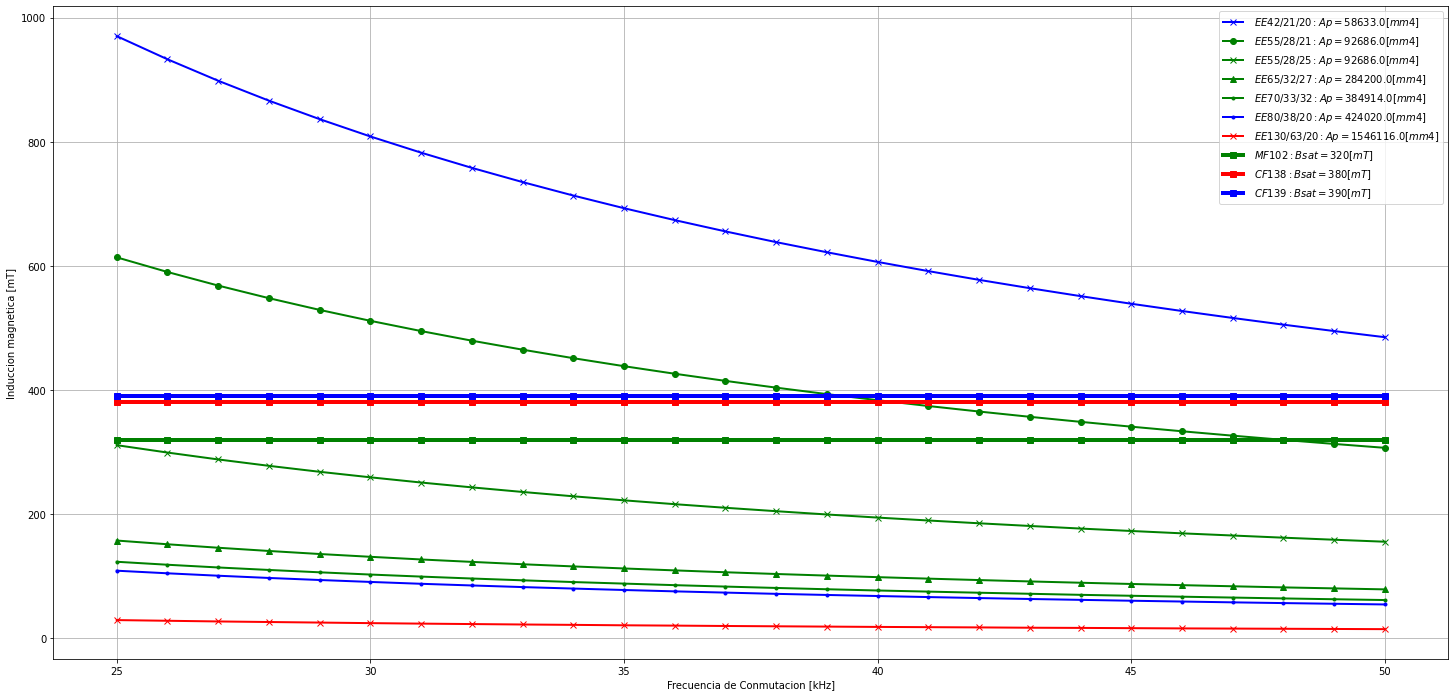

In [ ]:

# Para graficar corriente eficaz en inductor en funcion de 
# la frecuencia entre 10kHz y 50kHz. 

CorrienteMaxInductor.graficarParametrica(Vi_max,Vo_n,n,D,L)

# Variables especificas codigo InduccionNucleos.py
# Calculos de constantes Ap=Aw*Ae para diferentes nucleos
# disponibles en el mercado.

J=4.1*1e6   # Densidad de corriente
k=0.75      # Factor de apilamiento

# Nucleo EI2811
#Aw0 = 6.35*12.8*2
#Ae0 = 76
#Ap0 = Aw0*Ae0/1e12 #6177 mm4

# Nucleo E422120    Material : CF139-3C94   Bsat=320mT
Aw0 = 8.65*14.8*2
Ae0 = 229
Ap0 = Aw0*Ae0/1e12 # 58633 mm4

# Nucleo E552821    Material : Mf102        Bsat=320mT
#Aw1 = 10.15*18.5*2
#Ae1 = 349
#Ap1 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo     Material : Mf102        Bsat=320mT
Aw1 = 8.65*14.8*2
Ae1 = 181*2
Ap1 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo     Material : Mf102        Bsat=320mT
Aw2 = 11*38
Ae2 = 21*17
Ap2 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo E552825    Material : Mf102        Bsat=320mT
#Aw2 = 10.15*18.5*2
#Ae2 = 417
#Ap2 = Aw2*Ae2/1e12 # 156604 mm4

# Nucleo E653227    Material : Mf102        Bsat=320mT
Aw3 = 12.1*22.2*2
Ae3 = 529
Ap3 = Aw3*Ae3/1e12 # 284199 mm4

# Nucleo E703332    Material : Mf102        Bsat=320mT
Aw4 = 13*21.9*2
Ae4 = 676
Ap4 = Aw4*Ae4/1e12 # 384914 mm4

# Nucleo E803820    Material : CF139-3C94   Bsat=320mT
Aw5 = 19.65*28.2*2
Ae5 = 382.6
Ap5 = Aw5*Ae5/1e12 # 424020 mm4

# Nucleo E1306320   Material : CF138-3C85-3C90  Bsat=320mT
Aw6 = 24*42.5*2
Ae6 = 757.9
Ap6 = Aw6*Ae6/1e12 # 1546116 mm4

Pmax=200
Gcc_min=0.8

Ap_vector = np.array([Ap0,Ap1,Ap2,Ap3,Ap4,Ap5,Ap6])
Ae_vector = np.array([Ae0/1e6,Ae1/1e6,Ae2/1e6,Ae3/1e6,Ae4/1e6,Ae5/1e6,Ae6/1e6])
Aw_vector = np.array([Aw0,Aw1,Aw2,Aw3,Aw4,Aw5,Aw6])

InduccionNucleos.graficarInducciones(Aw_vector,Ae_vector,Ap_vector,Vi_max,Vo_n,n,D,Pmax,Gcc_min,k,J)
